<a href="https://colab.research.google.com/github/dikshap07/Algorithms-and-Data-Structures/blob/master/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing tensorflow dataset to access Fashion MNIST dataset

!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.9MB 5.0MB/s 
  Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [1]:
import tensorflow as tf

# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


print(tf.__version__)



2.5.0


###importing the dataset

In [2]:
dataset,metadata = tfds.load('fashion_mnist',as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset['train'],dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteIDL33C/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteIDL33C/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
#storing class names in a string because the dataset doesnt has names for classes

class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


###Exploring the data

In [4]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


###Preprocess the data

In [5]:
#value of each pixel in the image is an integer btw 0,255, for model to work properly we need to normalize it to rang e0,1
def normalize(images,labels):
  images = tf.cast(images,tf.float32)  #casting the image tensors to float32 datatype tensors
  images /= 255
  return images,labels


#map funtion applied the normalize function to each element in the train and test data

train_dataset = train_dataset.map(normalize)

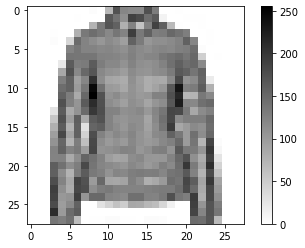

In [6]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(25):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

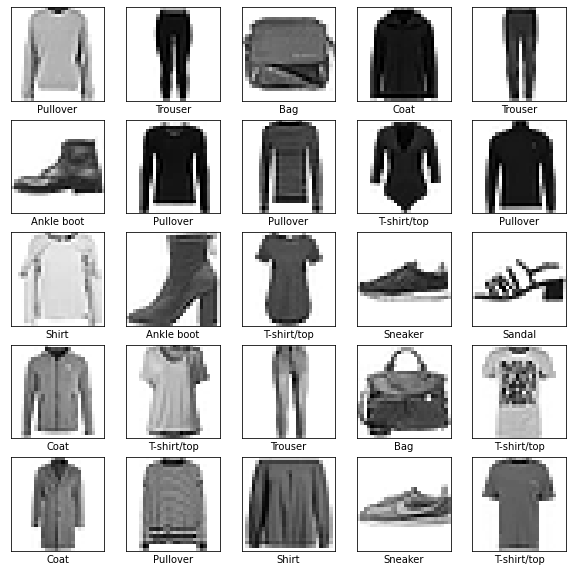

In [7]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

###Build the model

In [11]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28,1)),  #transforms 2-D image to 1-D (784 size) vector
                             tf.keras.layers.Dense(units = 128,activation=tf.nn.relu),  #dense layer  or hidden layer each nueron takes input from all 784 nodes of previous layer
                             tf.keras.layers.Dense(10,activation = tf.nn.softmax)               #output layer              
]) 

###Compile the model

In [12]:
model.compile(optimizer = "adam",    #we are not specifying learning rate so it will use default therefore we can pass it as a string
                loss = 'sparse_categorical_crossentropy',   #used for classification
              metrics=['accuracy'])

###Train the model

In [13]:
batch_size = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(batch_size)  #repeat will repeat teh dataset indefinitely and shuffle will shuffle the examples

test_dataset = test_dataset.batch(batch_size)

In [14]:
model.fit(train_dataset,epochs =5,steps_per_epoch=math.ceil(num_train_examples/batch_size))


Epoch 1/5
1875/1875 [==============================] - 13s 3ms/step - loss: 0.4744 - accuracy: 0.8308
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3581 - accuracy: 0.8701
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3188 - accuracy: 0.8827
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2970 - accuracy: 0.8898
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2741 - accuracy: 0.8980


###Evaluate Accuracy

In [15]:
test_loss, test_accuracy = model.evaluate(test_dataset,steps = math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 49.8778 - accuracy: 0.8734
Accuracy on test dataset: 0.8733999729156494


In [16]:
for test_images, test_labels in test_dataset.take(4):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [17]:
predictions.shape


(32, 10)

In [18]:
predictions[4]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
np.argmax(predictions[0])

4

In [20]:
test_labels[0]

4

In [21]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

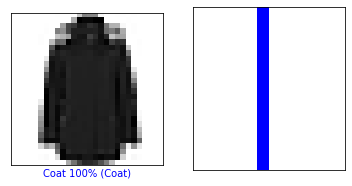

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

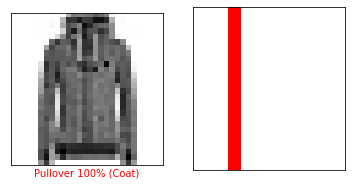

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

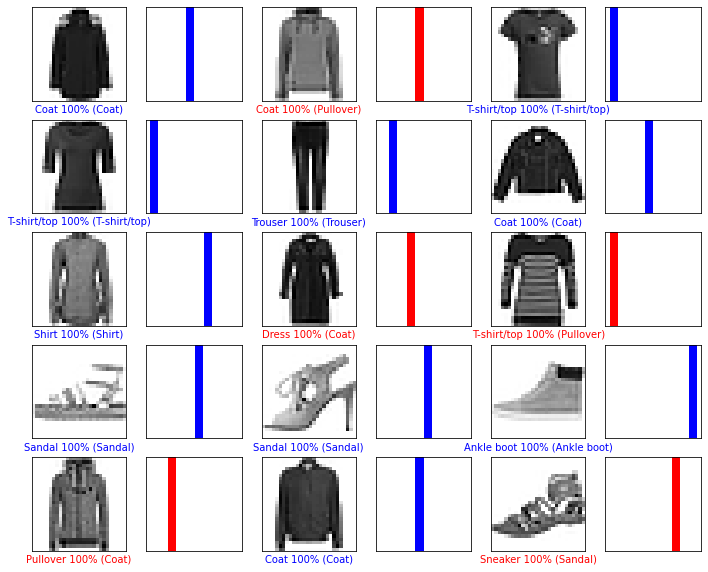

In [24]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [26]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [27]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


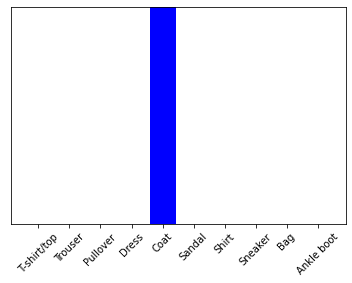

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

4